## EDA Analysis

## importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics as sts

In [2]:
df = pd.read_csv("C:/Users/Taofeek Ogungbemi/Downloads/heart_failure_clinical_records_dataset.csv")

In [3]:
df.groupby("DEATH_EVENT").size()

DEATH_EVENT
0    203
1     96
dtype: int64

In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Intuition from above 
- From the dataset, 25% of people in the datasets are more than 70 years old.
- And 75% are below 70 years old

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


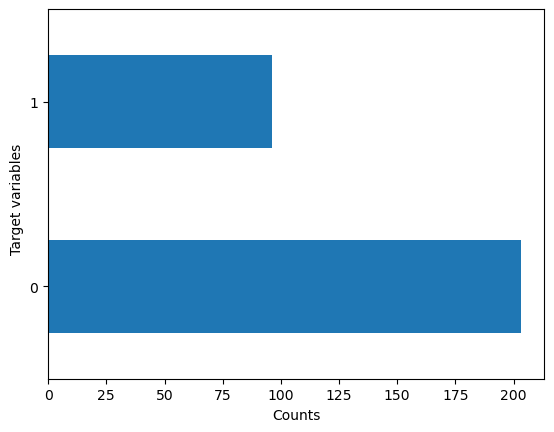

In [7]:
#  lets plot the counts of thode who died
df["DEATH_EVENT"].value_counts().plot(kind="barh")
plt.ylabel("Target variables  ")
plt.xlabel("Counts")
plt.show()

In [8]:
df["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

## let's find the percentage of those that died to those that didn't

In [10]:
round(df["DEATH_EVENT"].value_counts() / len(df) * 100)

DEATH_EVENT
0    68.0
1    32.0
Name: count, dtype: float64

## Inbalance data
- This shows that those who died are about 32% of the total record of patients in the dataset
- This needs to be addressed by analyzing the major causes of the death record.

In [12]:
df["age"].max()

95.0

In [17]:
df["age"].min()

40.0

## Feature binning on Age

In [5]:
# label = [f"{i} - {i + 11}" for i in range(1,100,12) ]
# df["Age_range"] = pd.cut(df["age"],range(1,120,12),right=False,labels = label)

labels  = ["20-40","41-60","61-80","Above 81"]
bins = [20,40,60,80,100]
df["Age_bins"] = pd.cut(df["age"],bins,labels = labels,include_lowest = True)

In [6]:
def find_anomalies(data):
    std_dev = sts.stdev(data)
    mean = sts.mean(data)
    outliers = []

    anomally_cut_off = 3 * std_dev
    least_value = mean - anomally_cut_off
    highest_value = mean + anomally_cut_off

    for num in data:
        if num > highest_value or num < least_value:
            outliers.append(num)

    return outliers
    

In [28]:
find_anomalies(df["age"])   #check for outliers  in age

[]

In [8]:
df["DEATH_EVENT"] = df["DEATH_EVENT"].astype(str)

## Outliers Check
- The columns which is neccessary to observe for Outliers  is 'Age' and it does not have any outliers.

## Lets see the correlation between each columns and death_event
-Using Univariate Analysis

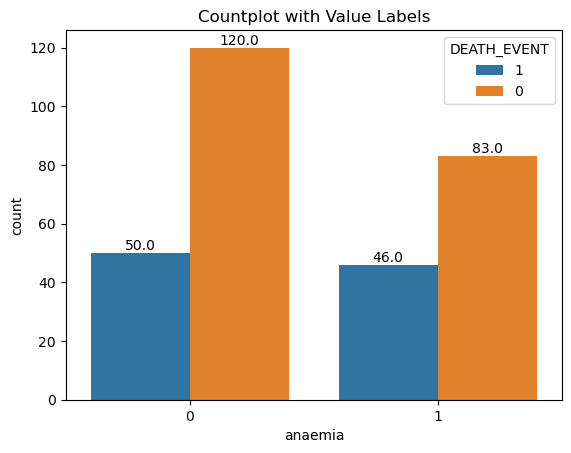

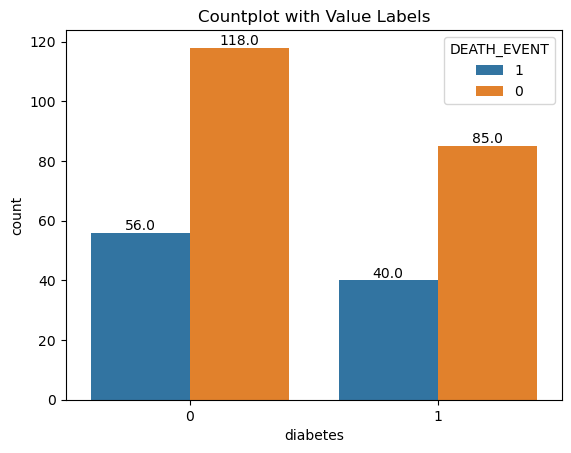

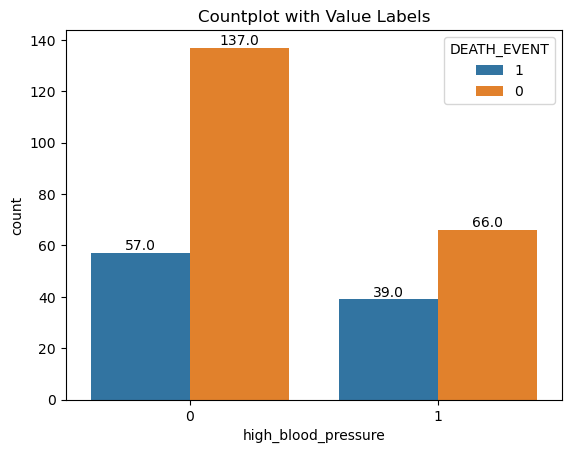

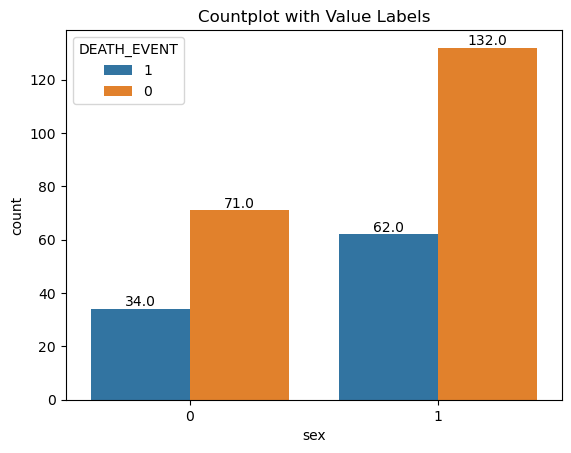

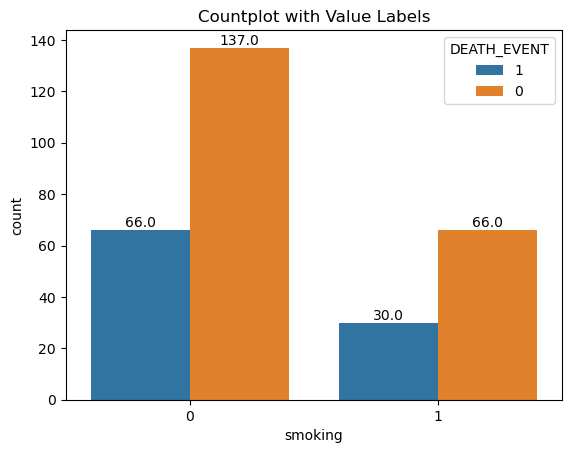

C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


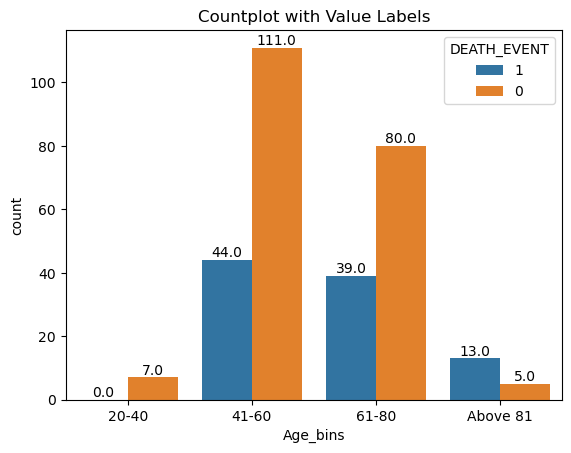

In [24]:
for i, pred in enumerate(df.drop(columns=["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_sodium","serum_creatinine","time","DEATH_EVENT"],axis=1)):
    ax = sns.countplot(data = df,x=pred,hue="DEATH_EVENT")
    for p in ax.patches:
        ax.annotate(
            format(p.get_height()),            # Value as integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
            ha='center', va='bottom', fontsize=10, color='black'
        )

    plt.title("Countplot with Value Labels")
    plt.show() 

## Observations from the chart

- It is observed that people who have anaemia,diabetes,high blood pressure and smoking are likely to die
- It is also observed that those people above 81years old are likely to die
- All these implies that those people who has any of the above mentioned diseases or health conditions are likely to die with respect to how old they are, if they are above 81years, There is high chance they die.
- The above intuition isn't enough, Lets use Bivariate Analysis or multivariate Analysis to check the relationship between multiple columns.

## Using Bivariate Analysis
- To find the correlaton between numerical features and target variable.

In [13]:
new_df =df
new_df.head()
new_df = new_df.drop("Age_bins",axis=1)

In [14]:
new_df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [130]:
new_df.drop("Age_bins",axis=1,inplace=True)

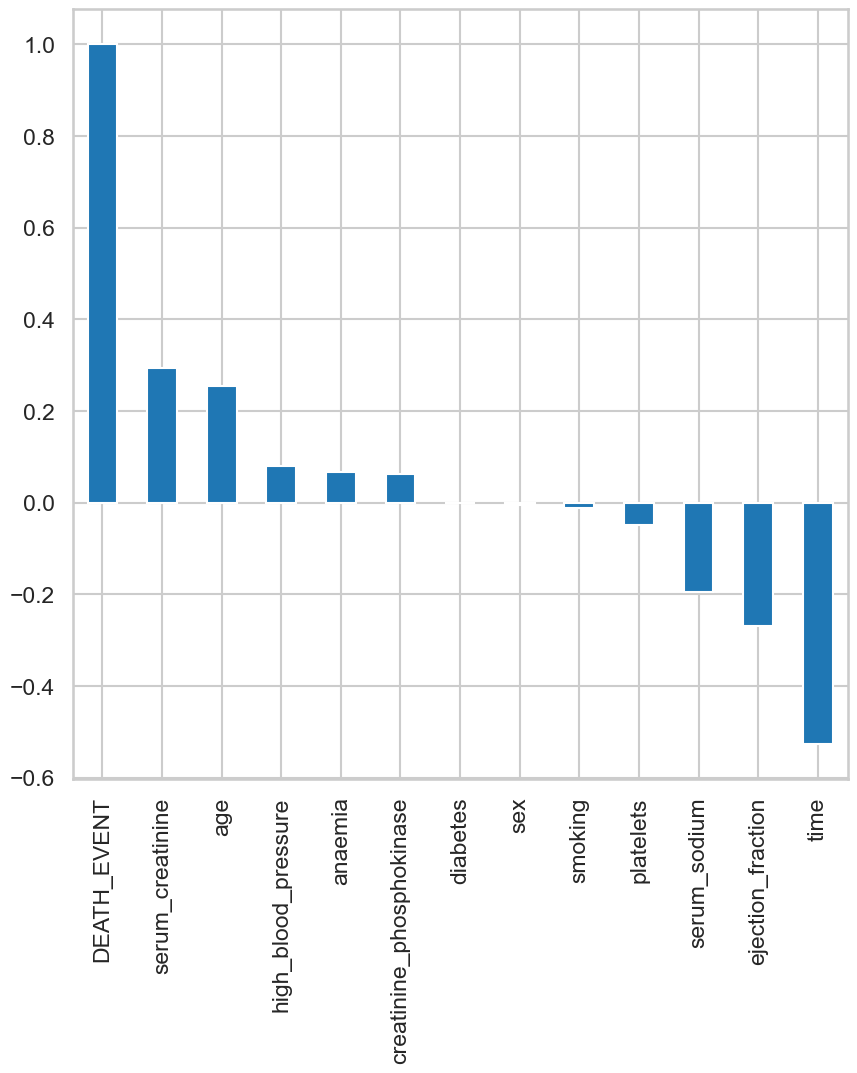

In [131]:
new_df.corr()["DEATH_EVENT"].sort_values(ascending=False).plot(kind="bar",figsize=(10,10))  
plt.show() #Correlation with respect to the target variable

### Is diabetes linked to smoking and high blood pressure 
- Lets use correlation to check 

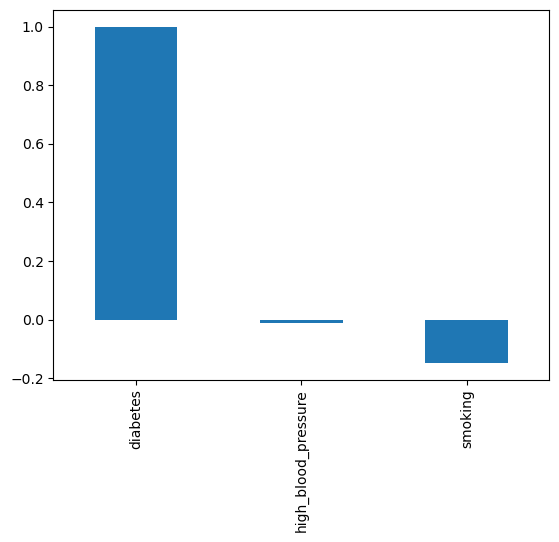

In [25]:
new_df[["smoking","high_blood_pressure","diabetes"]].corr()["diabetes"].sort_values(ascending=False).plot(kind="bar")
plt.show()

### Insight
- From the chart, this implies that diabetes is not linked to smoking and high blood pressure that is, a patient who has diabetes is not likely to be a smoker or has high blood pressure 

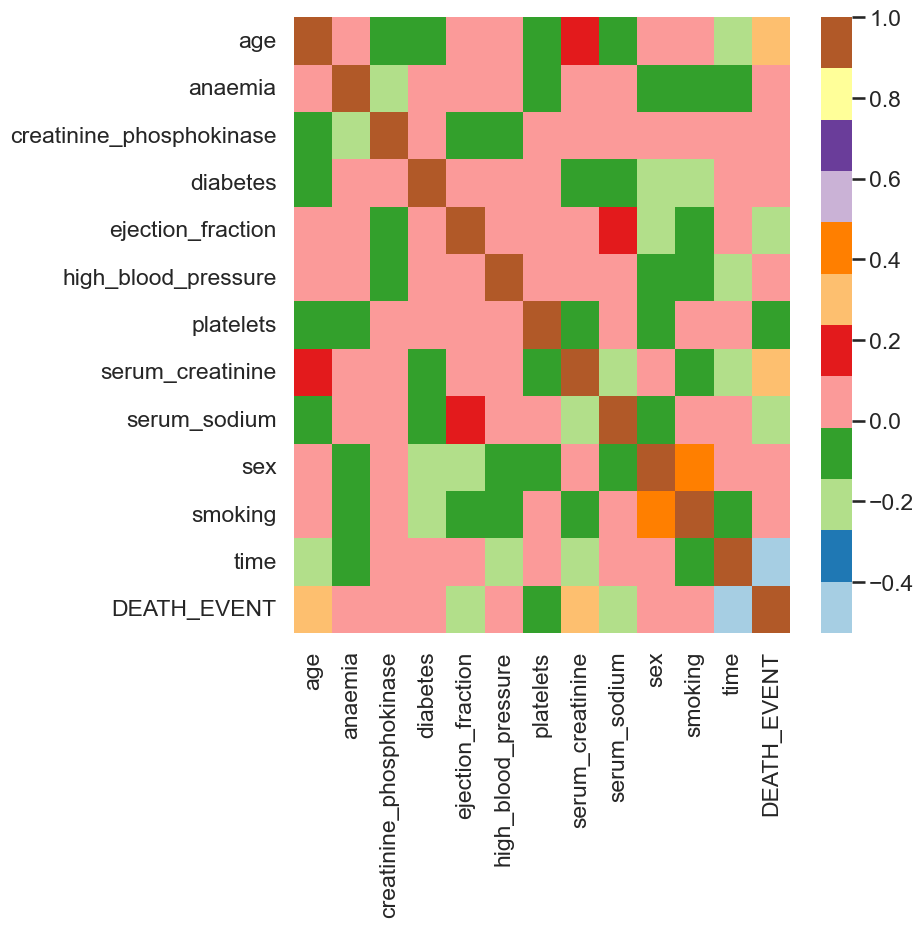

In [132]:
plt.figure(figsize = (8,8))
sns.heatmap(new_df.corr(),cmap="Paired")
plt.show()

## Correlaton analysis insights
- It is observed that the columns which has positive correlation includes **serum creatinine,high blood pressure,age,anaemia,creatinine phosphokinase**

In [158]:
def show_instint(data,column,color1,color2):
    graph = sns.kdeplot(data=data[column][(data["DEATH_EVENT"].astype(int) == 1)],color=color1,fill=True)  #plotting graph with respect to those that died
    graph = sns.kdeplot(data=data[column][(data["DEATH_EVENT"].astype(int) == 0)],color=color2,fill=True)   #plotting graph with respect to those that didn't die
    graph.legend(["Death","No Death"],loc="upper right")
    graph.set_ylabel("Density")
    graph.set_xlabel(column)

C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


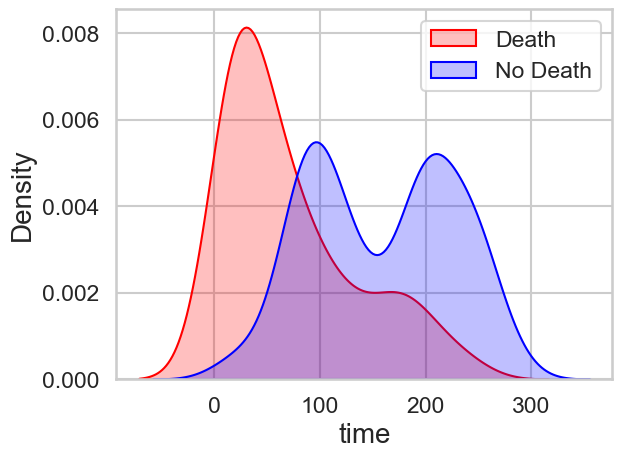

In [159]:
show_instint(df,"time","red","blue")

C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


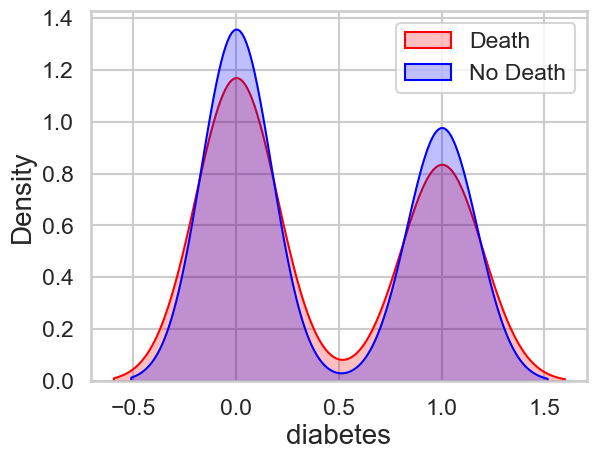

In [100]:
show_instint(df,"diabetes","red","blue")

In [135]:
label = ["0-2","2.1-3","3.1-4","4.1-5","Above 5"]
bins = [0,2,4,6,8,10]
df["serum_bins"] = pd.cut(df["serum_creatinine"],bins,labels=label,include_lowest=True)

C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


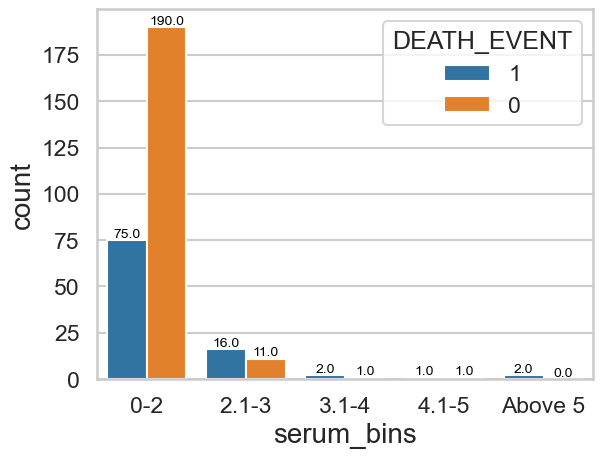

In [161]:
ax = sns.countplot(data=df,x="serum_bins",hue=df["DEATH_EVENT"].astype(str))
for p in ax.patches:
        ax.annotate(
            format(p.get_height()),            # Value as integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
            ha='center', va='bottom', fontsize=10, color='black'
        )
plt.show()

## Insight 
- It is observed that high serum_creatinine value is likely to cause death so urgent medical attention is required for patient having creatine value above 2

## Bivariate Analysis

In [82]:
death_df = df[df["DEATH_EVENT"].astype(int) == 1]
no_death = df[df["DEATH_EVENT"].astype(int) == 0]

In [83]:
len(death_df)

96

In [84]:
len(no_death)

203

# Feature Encoding on the categorical columns

In [99]:
new_df_dummy = pd.get_dummies(df)

# Correlation between features and target variables

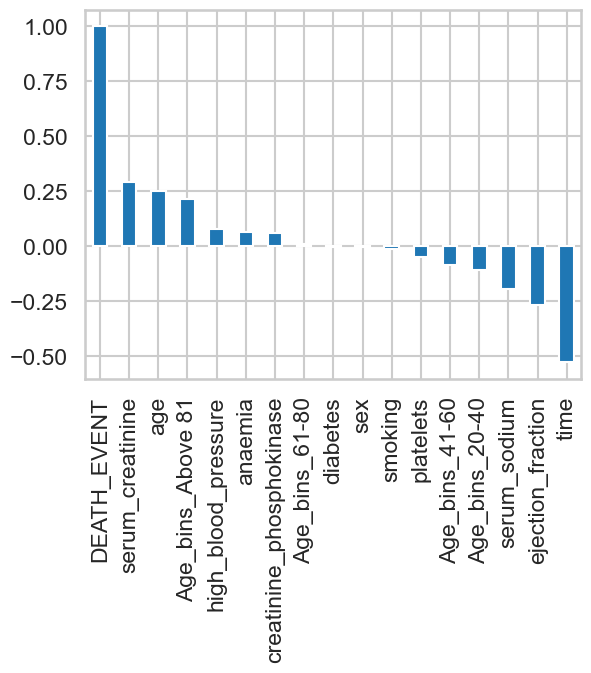

In [106]:
new_df_dummy.corr()["DEATH_EVENT"].sort_values(ascending=False).plot(kind="bar")
plt.show()

- Let's check the correlation between features with respect to death and no death

In [116]:
def uniplot(df,col,title,hue=None):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30

    temp = pd.Series(data = hue)
    fig,ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale("log")
    plt.title(title)
    ax = sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette="bright")
    for p in ax.patches:
        ax.annotate(
            format(p.get_height()),            # Value as integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
            ha='center', va='bottom', fontsize=16, color='black'
        )

    plt.title("Countplot of patients")
    plt.show() 

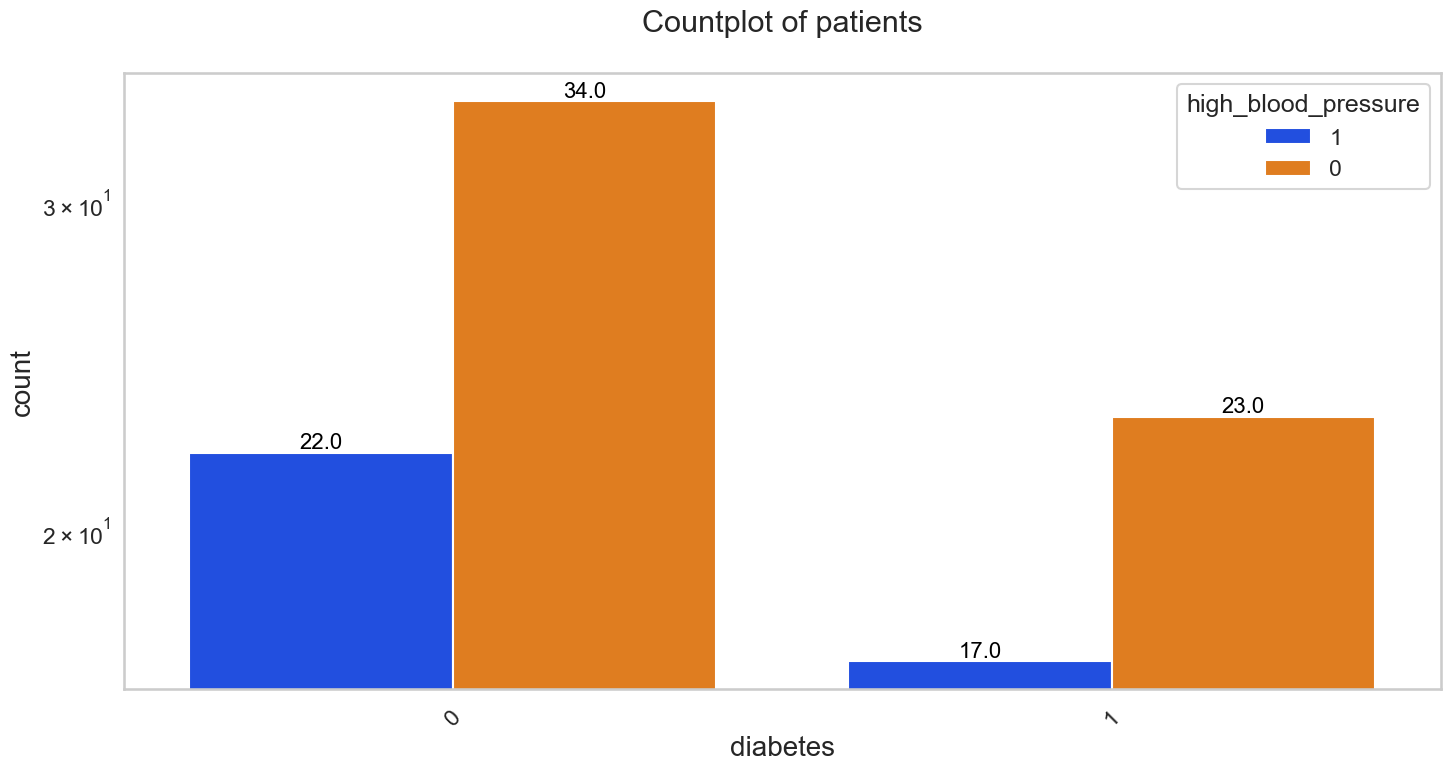

In [119]:
uniplot(death_df,"diabetes","Relationship between Diabetes and High blood pressure who died",hue=death_df["high_blood_pressure"].astype(str))

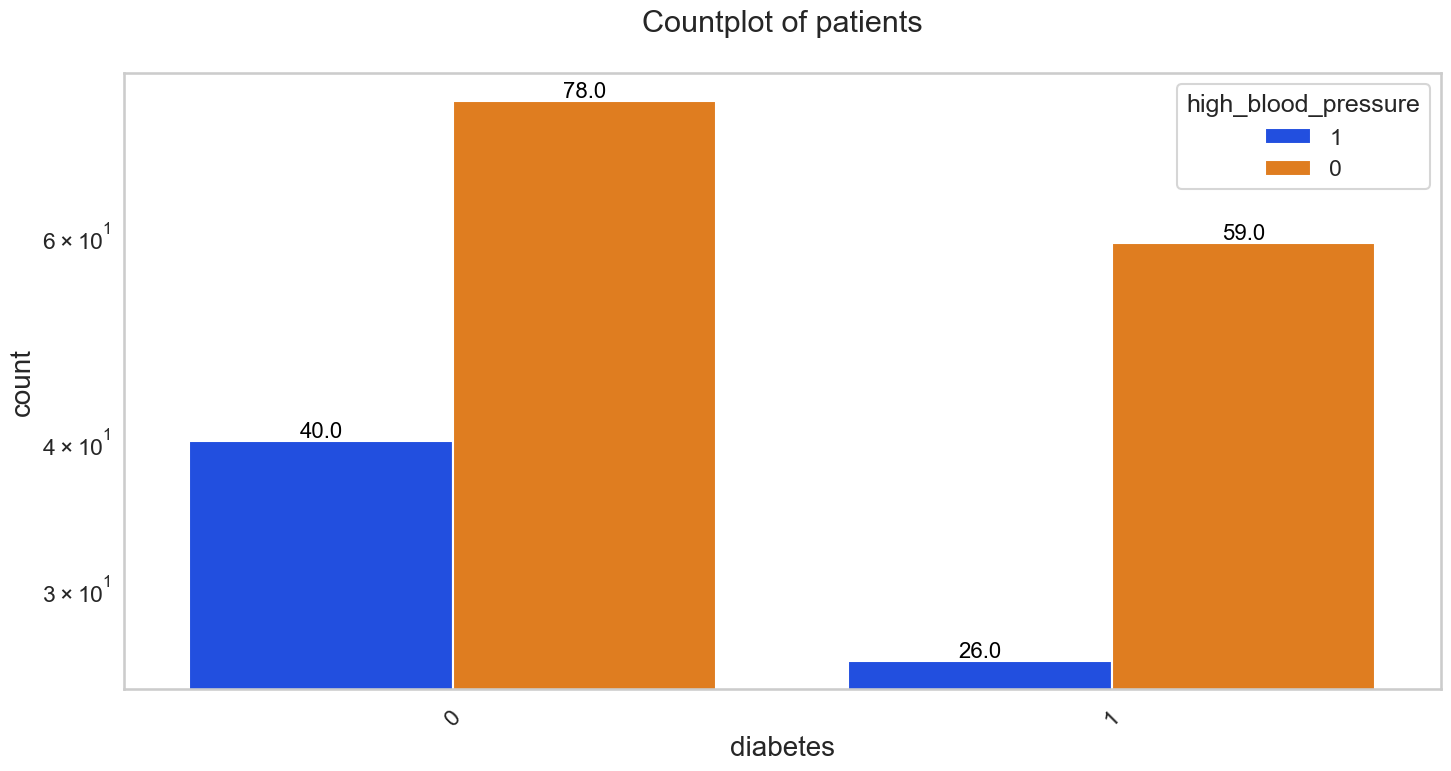

In [162]:
uniplot(no_death,"diabetes","Relationship between Diabetes and High blood pressure who died",hue=no_death["high_blood_pressure"].astype(str))

- About 34% of diabetes patients  
- From the above chart, It is observed that patients who died are less likely to have  high blood pressure and diabetes
- There are still high number of patients who died without having high blood pressure and diabetes
- Let's check other factors

C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


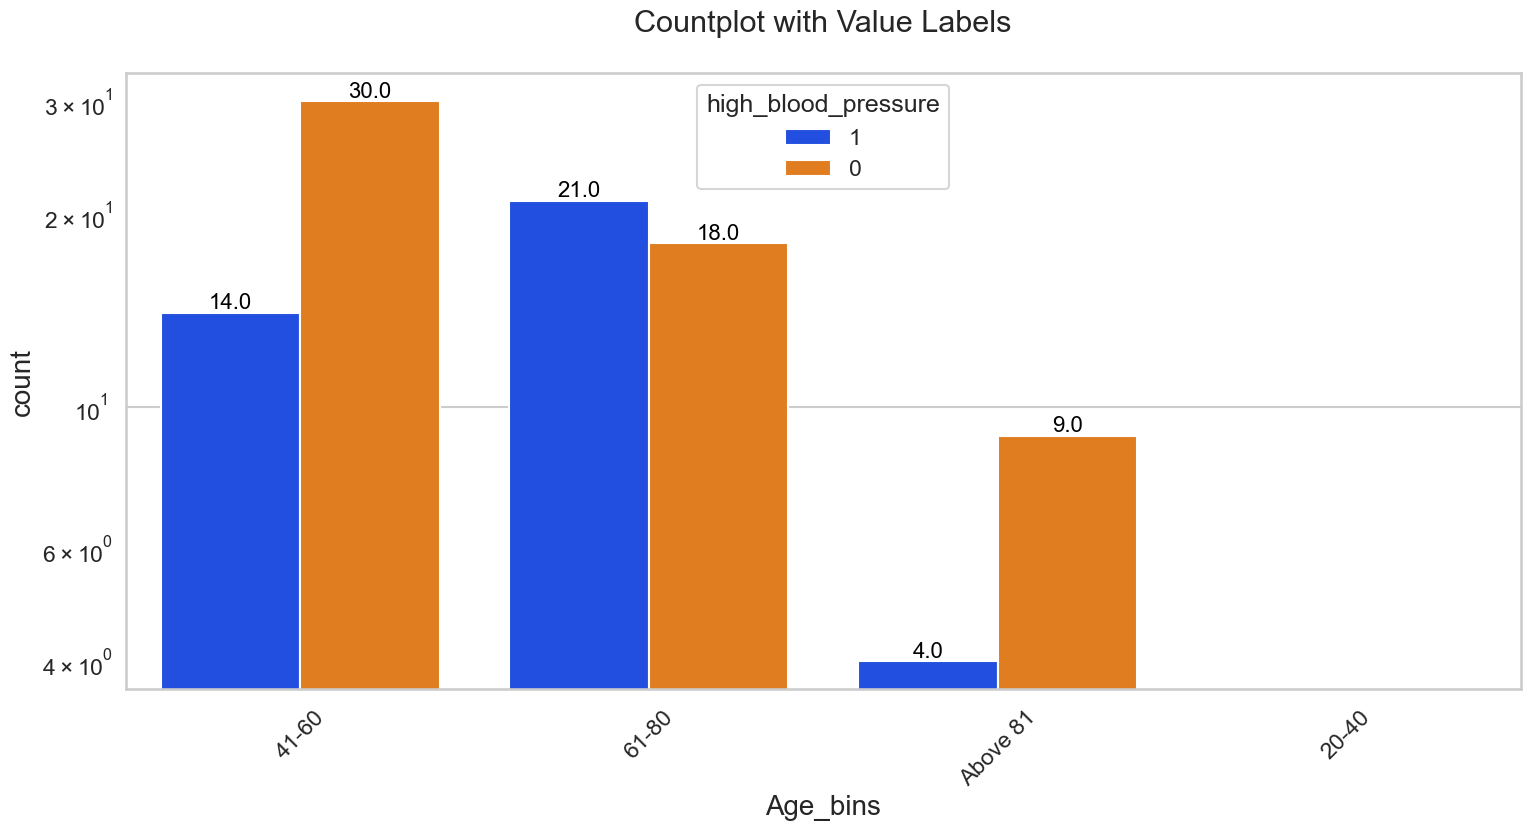

In [113]:
uniplot(death_df,"Age_bins","Relationship between Age and High blood pressure who died",hue=death_df["high_blood_pressure"].astype(str))

- It is observed that majority of patients who died and have high blood pressure are bewteen 61 - 80 years old

C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


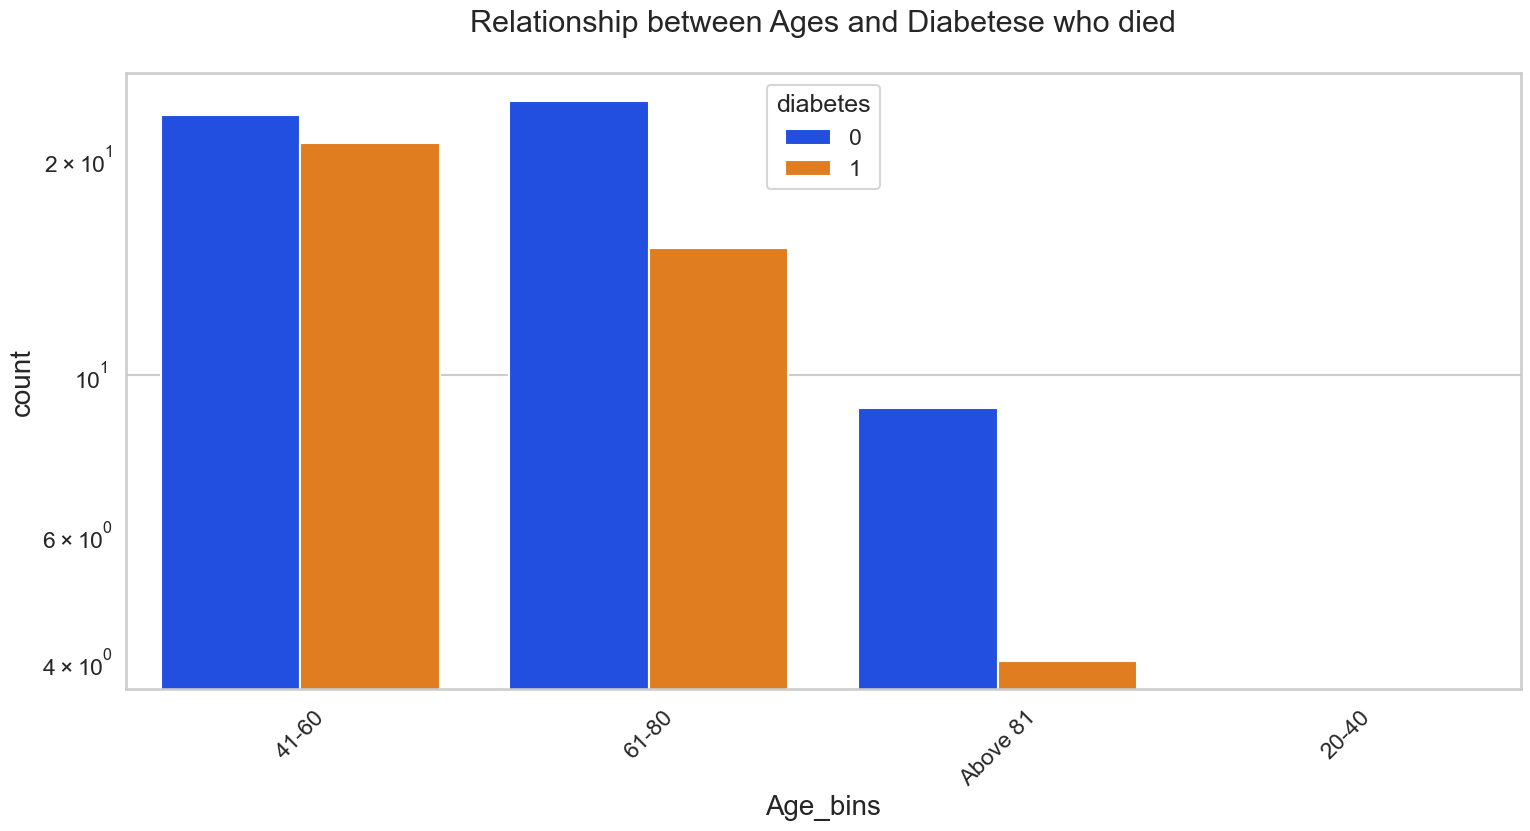

In [105]:
uniplot(death_df,"Age_bins","Relationship between Ages and Diabetese who died",hue=death_df["diabetes"].astype(str))

- Patients having diabetes have similar characteristics as high blood pressure i.e high death rate between 41 - 80 years

- Those patients who smoke but doesn't have diabetes are about 66
- About 31% of those who smoke has diabetes
- About 47% of those who has diabetes doesn't smoke 
- From the above insight, Those who smoke are not likely to have diabetes because smoking is not likely to cause diabetes

C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Taofeek Ogungbemi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


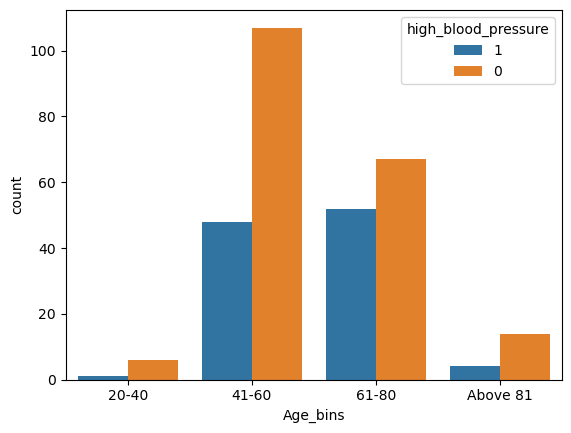

In [27]:
sns.countplot(data=df,x="Age_bins",hue=df["high_blood_pressure"].astype(str))
plt.show()

s..d